In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib

import os

os.chdir('..')

import data_pulling
import get_portfolio
from evaluation_metrics import evaluate_portfolio

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

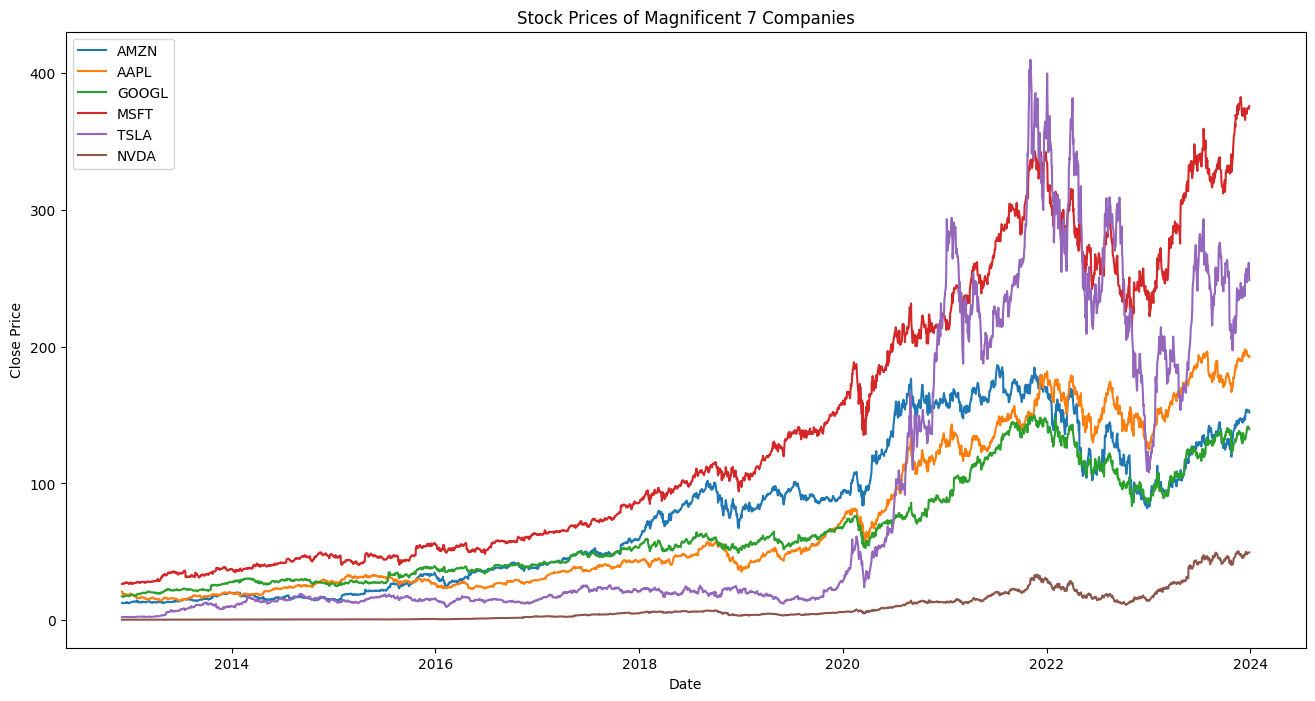

In [2]:
df = get_portfolio.get_data_files()

df_dict = {'AMZN': df['AMZN'], 'AAPL': df['AAPL'], 'GOOGL': df['GOOGL'], 'MSFT': df['MSFT'], 'TSLA': df['TSLA'], 'NVDA': df['NVDA']}

plt.figure(figsize=(16, 8))

for key in df_dict:
    plt.plot(df_dict[key].index, df_dict[key]['Close'], label=key)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices of Magnificent 7 Companies')
plt.legend()

plt.show()


In [3]:
import yfinance as yf

def get_spx():
    spx = yf.download('^GSPC', start='2012-12-31', end='2023-12-31', auto_adjust=True)
    spx = spx['Close']
    spx = spx.resample('D').ffill() # forward fill missing data
    return spx

spx = get_spx()

[*********************100%***********************]  1 of 1 completed


### Visualizing Buying and Selling Signals

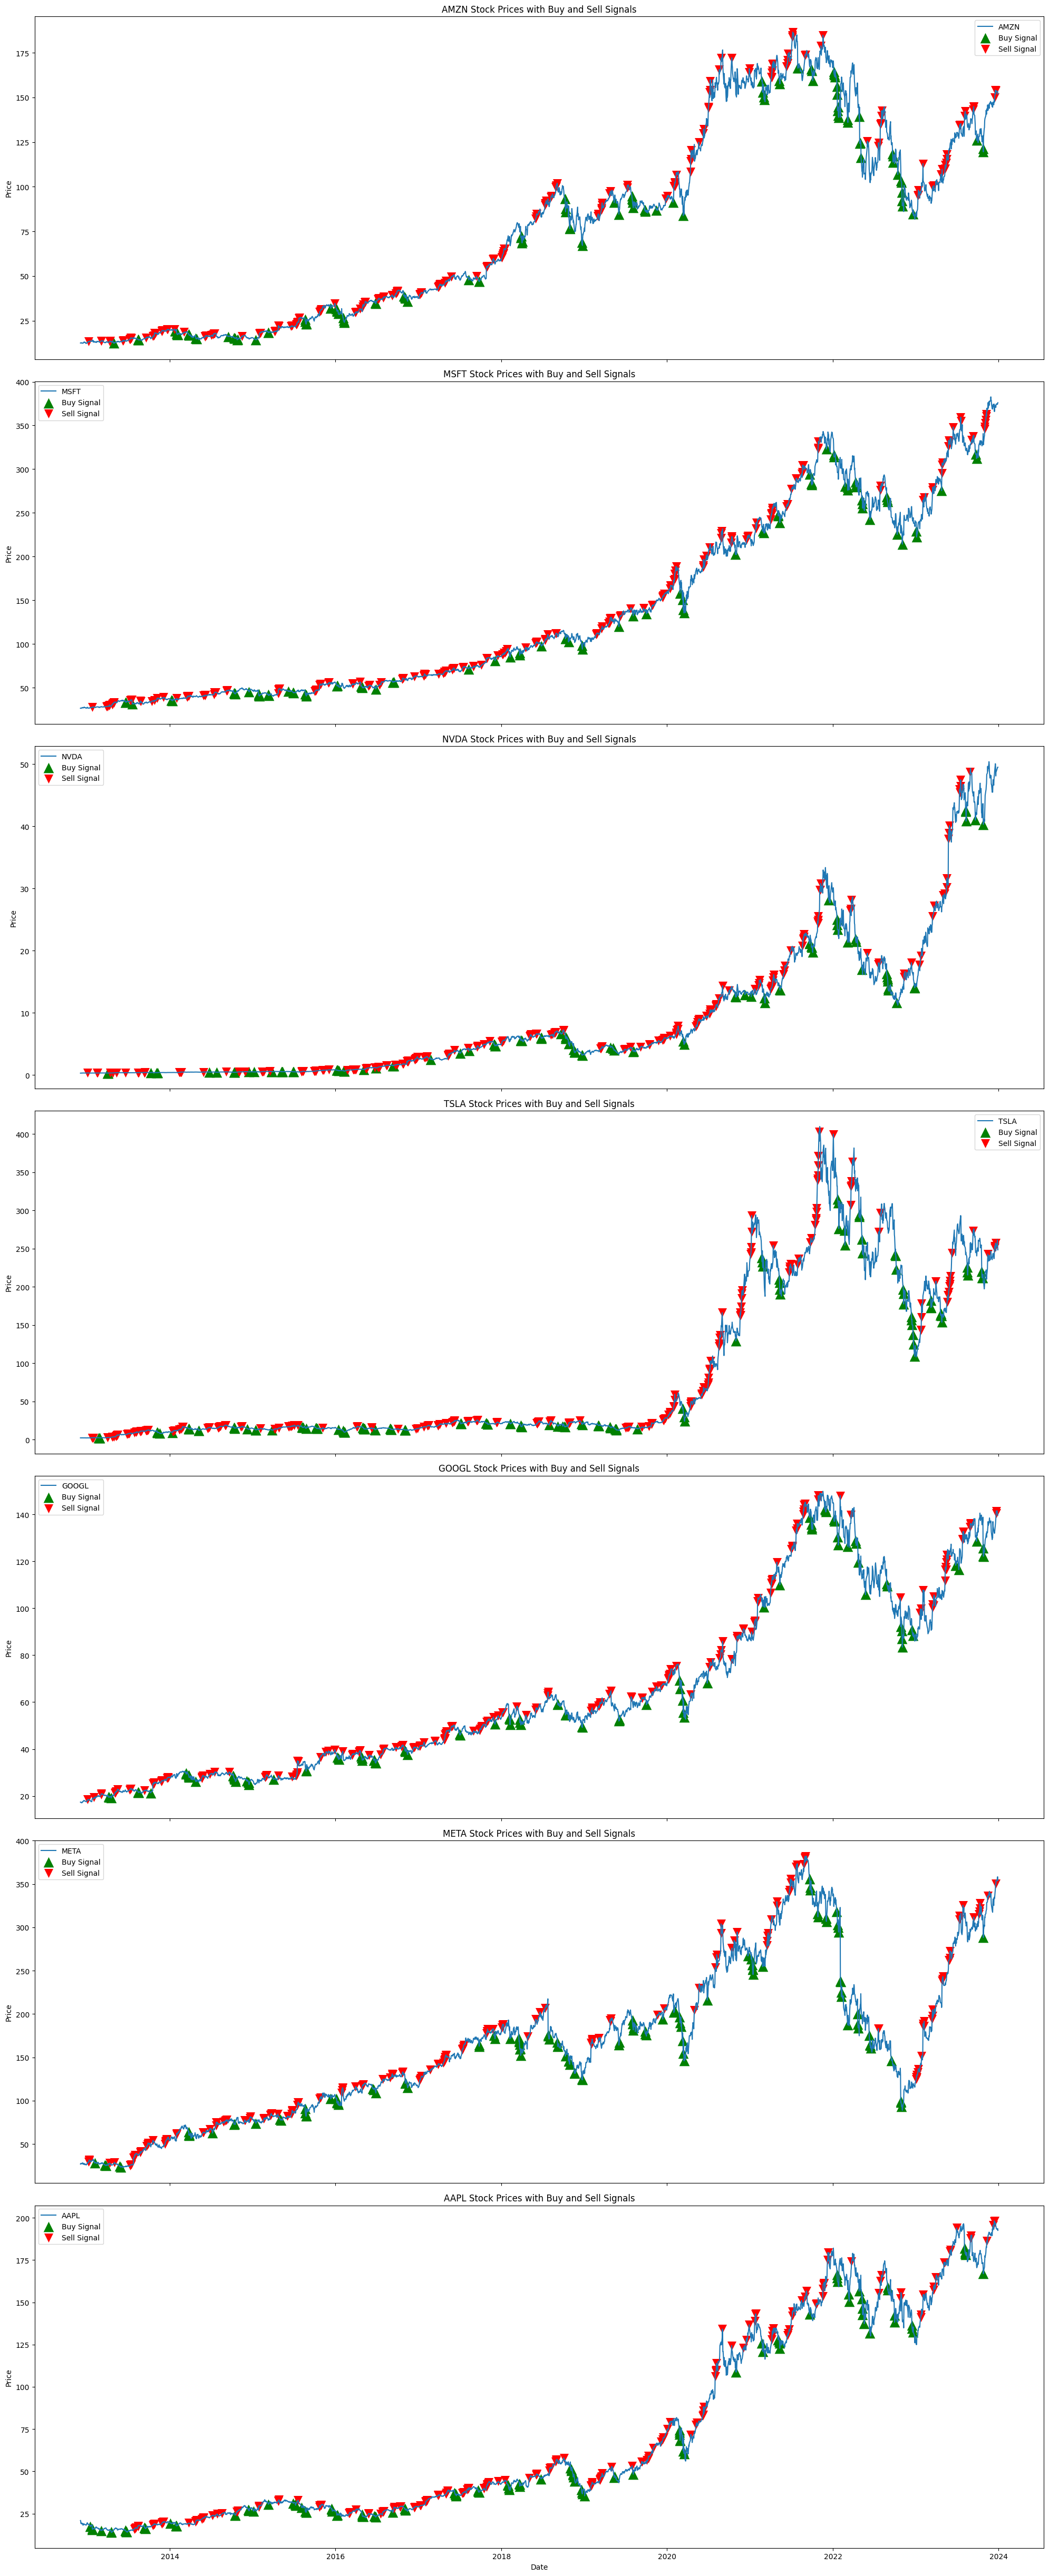

In [4]:
temp_dict = get_portfolio.get_data_files('temp')

num_stocks = len(temp_dict)

fig, axs = plt.subplots(num_stocks, 1, figsize=(20, 7 * num_stocks), sharex=True)

for i, key in enumerate(temp_dict):
    axs[i].plot(temp_dict[key].index, temp_dict[key]['Close'], label=key)
    
    axs[i].scatter(temp_dict[key].loc[temp_dict[key]['Buy Signal'] == True].index, 
                   temp_dict[key]['Close'][temp_dict[key]['Buy Signal'] == True], 
                   marker='^', color='g', label='Buy Signal', lw=0, s=200)

    axs[i].scatter(temp_dict[key].loc[temp_dict[key]['Sell Signal'] == True].index,
                   temp_dict[key]['Close'][temp_dict[key]['Sell Signal'] == True],
                   marker='v', color='r', label='Sell Signal', lw=0, s=150)

    axs[i].set_title(f'{key} Stock Prices with Buy and Sell Signals')
    axs[i].set_ylabel('Price')
    axs[i].legend()

plt.xlabel('Date')

plt.tight_layout()

plt.show()


### Finding best risk factor per trade 

Analysis to determine the optimal amount of risk to allocate per trade using an ATR (Average True Range) position sizing strategy. The ATR strategy adjusts position sizes based on market volatility—higher volatility leads to smaller positions, while lower volatility allows for larger positions. Finding the optimal risk factor ensures that each trade’s risk is balanced relative to the overall portfolio, improving long-term returns while minimizing potential drawdowns.

We iterates through different risk levels (ranging from 0.001 to 0.01), generating and evaluating portfolios based on each level of risk. 

In [5]:
results = pd.DataFrame()
data_dict = get_portfolio.get_data_files('data')

results_list = []

for risk in np.arange(0.001, 0.01, 0.0005):
    print("Testing with risk level of", risk)
    temp_port = get_portfolio.generate_portfolio(data_dict, position_sizing='risk', risk_factor=risk)
    temp_eval = evaluate_portfolio(temp_port)

    results_list.append({'Risk Level': risk, 
                         'Total Return': temp_eval['Total Return'],
                         'Annual Return': temp_eval['Annual Return'],
                         'Annual Volatility': temp_eval['Annual Volatility'],
                         'Sharpe Ratio': temp_eval['Sharpe Ratio'],
                         'Sortino Ratio': temp_eval['Sortino Ratio'],
                         'Max Drawdown': temp_eval['Max Drawdown']
                         })
results = pd.DataFrame(results_list)

results = results.set_index('Risk Level')

Testing with risk level of 0.001


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0045000000000000005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0055


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.006500000000000001


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.007


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.009000000000000001


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Testing with risk level of 0.0095


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
print(results)

print("\n\nOptimal Risk Level According to Annual Return:", results['Annual Return'].idxmax())
optimal_risk_return = results['Annual Return'].idxmax()  

print("\n\nOptimal Risk Level According to Sharpe Ratio:", results['Sharpe Ratio'].idxmax())
optimal_risk_sharpe = results['Sharpe Ratio'].idxmax()

            Total Return  Annual Return  Annual Volatility  Sharpe Ratio  \
Risk Level                                                                 
0.0010        357.393709      14.822337           0.151001      0.916438   
0.0015        560.543359      18.723444           0.180288      0.980259   
0.0020        828.382713      22.454623           0.199896      1.057939   
0.0025       1111.981051      25.458364           0.211462      1.126210   
0.0030       1422.299369      28.085511           0.220253      1.184224   
0.0035       1738.121683      30.299610           0.226024      1.235686   
0.0040       2039.550736      32.110829           0.231726      1.270632   
0.0045       2320.173507      33.599314           0.236609      1.296721   
0.0050       2647.853348      35.150481           0.241658      1.322499   
0.0055       2916.279949      36.300492           0.245006      1.342406   
0.0060       3053.012555      36.850942           0.249303      1.339739   
0.0065      

### Compare Optimal Portfolio Performance to S&P500

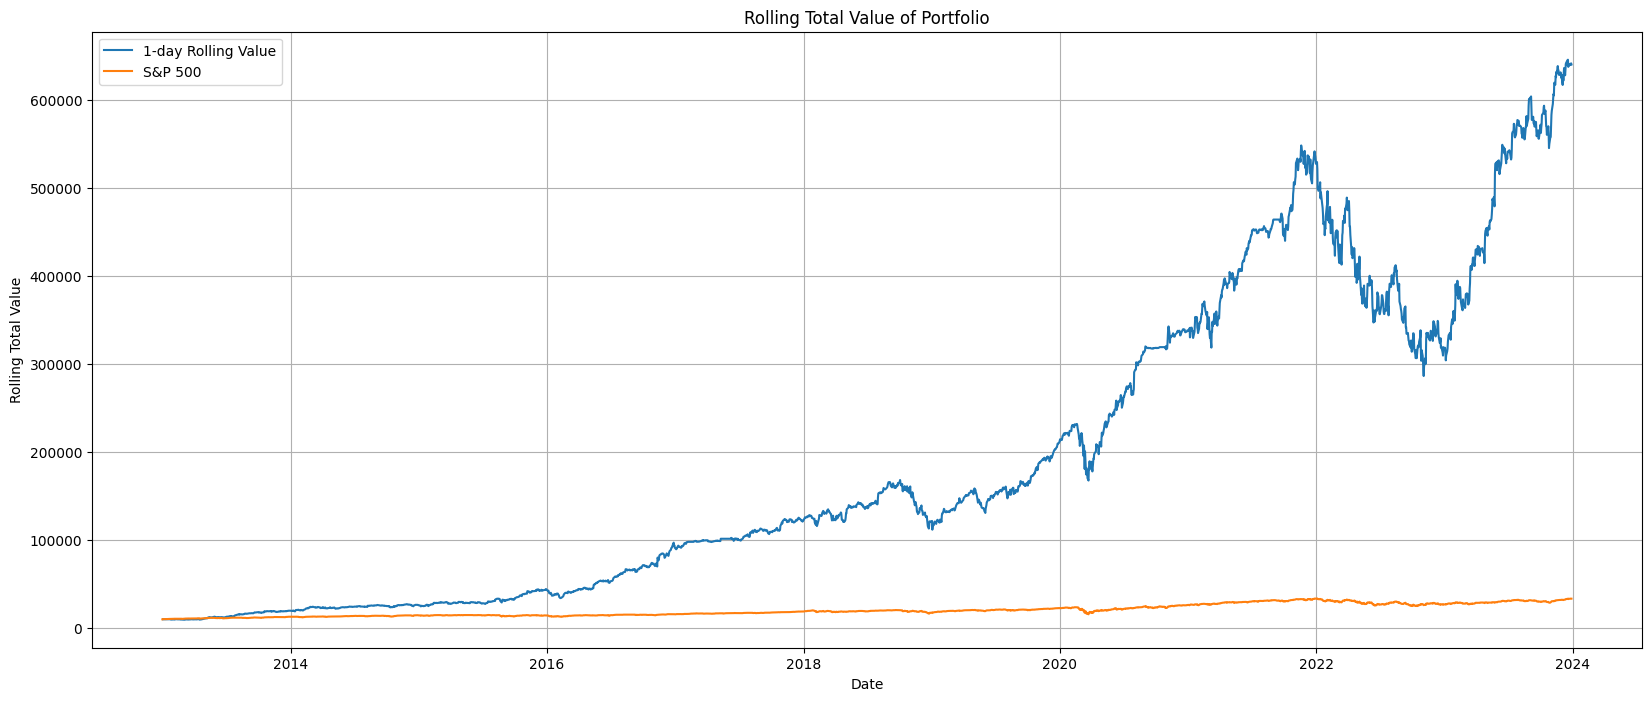

In [7]:
optimal_portfolio = get_portfolio.generate_portfolio(data_dict, position_sizing='risk', risk_factor=optimal_risk_sharpe)

rolling_value_x = 1

# plot rolling total value of the portfolio for visibility
optimal_portfolio[f'Rolling {rolling_value_x}D Total Value'] = optimal_portfolio['Total'].ewm(span=rolling_value_x).mean()

plt.figure(figsize=(20, 8))
plt.plot(optimal_portfolio.index, optimal_portfolio[f'Rolling {rolling_value_x}D Total Value'], label=f'{rolling_value_x}-day Rolling Value')
plt.plot(spx/spx.iloc[0]*10000, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Rolling Total Value')
plt.title('Rolling Total Value of Portfolio')
plt.legend()
plt.grid(True)
plt.show()


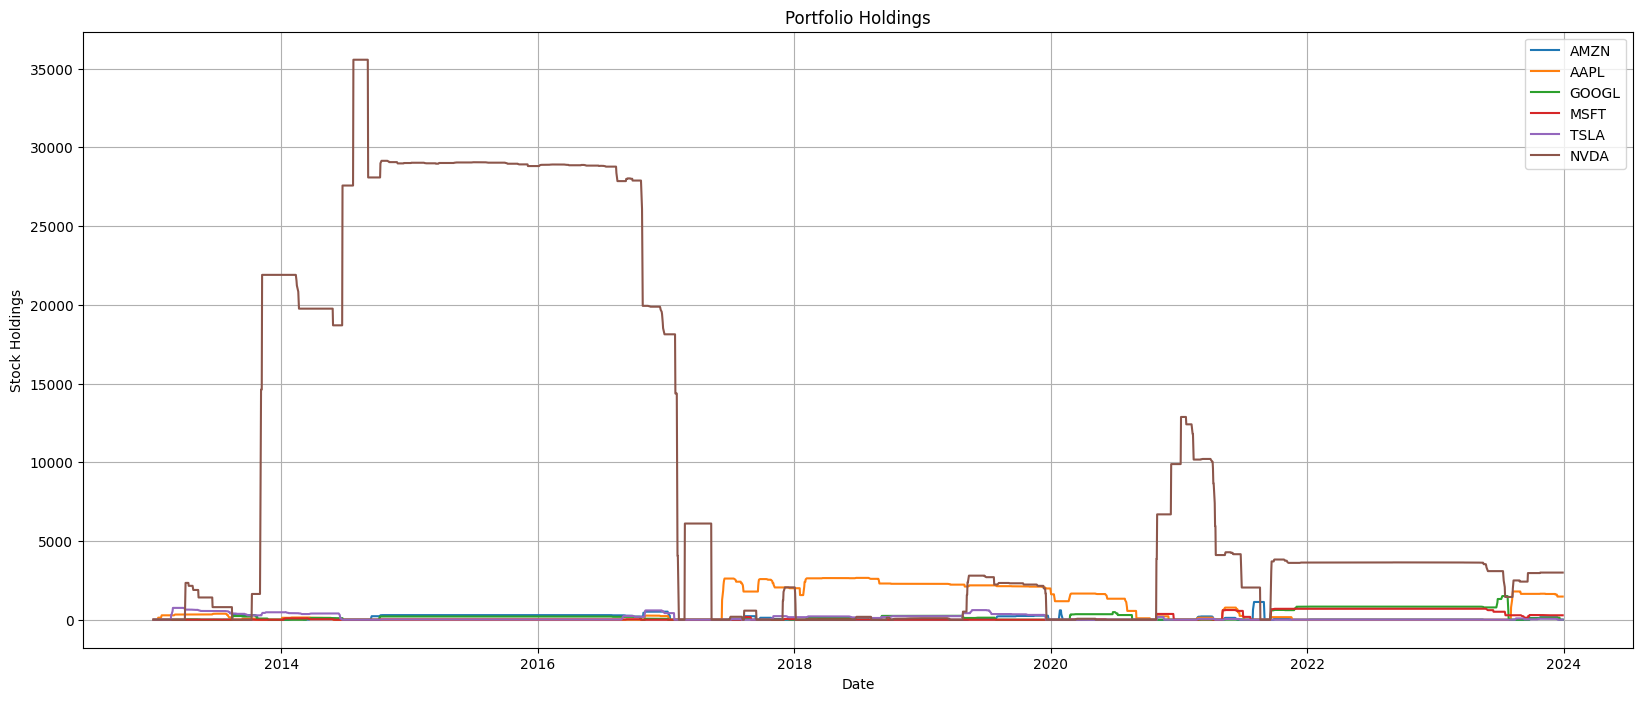

In [8]:
# see how the portfolio holdings change
plt.figure(figsize=(20, 8))
plt.plot(optimal_portfolio.index, optimal_portfolio['AMZN'], label='AMZN')
plt.plot(optimal_portfolio.index, optimal_portfolio['AAPL'], label='AAPL')
plt.plot(optimal_portfolio.index, optimal_portfolio['GOOGL'], label='GOOGL')
plt.plot(optimal_portfolio.index, optimal_portfolio['MSFT'], label='MSFT')
plt.plot(optimal_portfolio.index, optimal_portfolio['TSLA'], label='TSLA')
plt.plot(optimal_portfolio.index, optimal_portfolio['NVDA'], label='NVDA')

plt.xlabel('Date')
plt.ylabel('Stock Holdings')
plt.title('Portfolio Holdings')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# optimal_portfolio.index = pd.to_datetime(optimal_portfolio['Date'])
evaluation_metrics = evaluate_portfolio(optimal_portfolio)
print("Portfolio Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

spx = get_spx()
spx = spx.to_frame('Total')

spx_evaluation = evaluate_portfolio(spx)
print("\n\nS&P 500 Evaluation Metrics:")
for metric, value in spx_evaluation.items():
    print(f"{metric}: {value:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Portfolio Evaluation Metrics:
Total Return: 6304.6811
Annual Return: 45.9577
Annual Volatility: 0.2670
Sharpe Ratio: 1.5098
Sortino Ratio: 0.1191
Max Drawdown: -0.4777


S&P 500 Evaluation Metrics:
Total Return: 234.4456
Annual Return: 10.5844
Annual Volatility: 0.1432
Sharpe Ratio: 0.5209
Sortino Ratio: 0.0158
Max Drawdown: -0.3392
